# 1. Data organization

In [ ]:
import pandas as pd
import numpy as np
 
# reading csv file
df = pd.read_csv("/content/CSIRE_data_all_tissues.csv", delimiter=";")
# replace commas with decimal
for i in range(6,len(df.columns)):
  df[df.columns[i]] = df[df.columns[i]].str.replace(',', '.').astype(float)

In [ ]:
df

,Unnamed: 0,ensembl_gene_id,ensembl_transcript_id_version,external_gene_name,tissue,X,baseMean,log2FoldChange,lfcSE,pvalue,padj
0,1,ENSG00000210127,ENST00000387392.1,MT-TA,adipose,924,0.962360,-0.728126,0.132356,5.390790e-09,1.263643e-08
1,2,ENSG00000210127,ENST00000387392.1,MT-TA,blood,1002,0.962360,-0.581640,0.138439,2.136818e-05,3.674662e-05
2,3,ENSG00000210127,ENST00000387392.1,MT-TA,blood_vessel,1090,0.962360,-0.884661,0.123659,1.423165e-13,3.813555e-13
3,4,ENSG00000210127,ENST00000387392.1,MT-TA,breast,652,0.962360,-0.984265,0.231722,1.264723e-06,4.447489e-06
4,5,ENSG00000210127,ENST00000387392.1,MT-TA,lung,609,0.962360,-0.830134,0.175321,2.995317e-07,8.144661e-07
...,...,...,...,...,...,...,...,...,...,...,...
1409326,1409327,ENSG00000106113,ENST00000423776.1,CRHR2,vagina,749,0.307861,1.183143,0.399385,1.465384e-04,6.377472e-04
1409327,1409328,ENSG00000248994,ENST00000513419.1,NaN,vagina,4318,0.264562,1.364021,0.403367,2.731317e-05,1.374703e-04
1409328,1409329,ENSG00000185761,ENST00000591077.2,ADAMTSL5,vagina,7578,0.288613,2.243811,0.555348,2.407350e-06,1.474932e-05
1409329,1409330,ENSG00000232454,ENST00000452964.2,NaN,vagina,6978,0.710317,0.752064,0.134853,4.221439e-09,4.021332e-08


In [ ]:
#create array of dataframes (each df contains specific type of tissue)
tissuetypes = df.tissue.unique()
tissuearray = []

for item in tissuetypes:
  tissuearray.append(df[df['tissue'] == item])

print(tissuetypes)
#print(tissuearray)

['adipose' 'blood' 'blood_vessel' 'breast' 'lung' 'nerve' 'ovary'
 'pituitary' 'prostate' 'testis' 'thyroid' 'uterus' 'vagina' 'adrenal'
 'brain' 'heart' 'muscle' 'colon' 'esophagus' 'liver' 'pancreas'
 'salivary' 'si' 'skin' 'spleen' 'stomach' 'kidney' 'bladder' 'cervix'
 'falp_tube']


# 2. Summary Figures

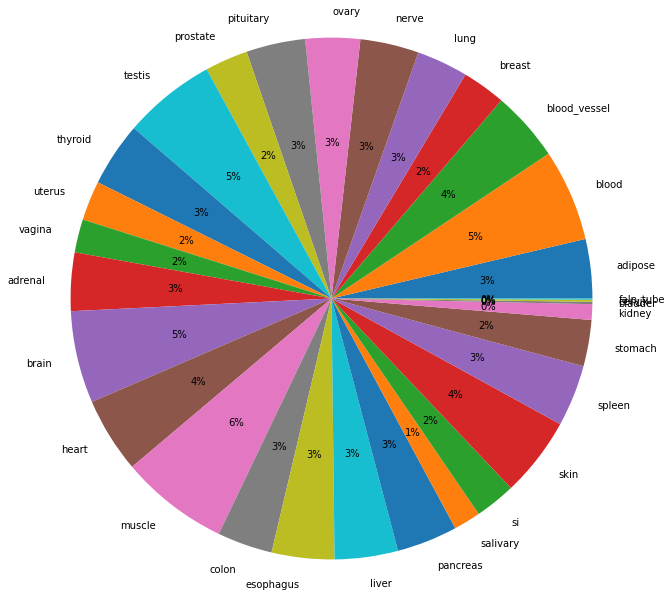

In [ ]:
import matplotlib.pyplot as plt
dflength = df.shape[0]

#create array of proportion of each tissue
tissueproportion = []

for item in tissuearray:
  tissueproportion.append(item.shape[0]/dflength)

#make pie chart
plt.pie(tissueproportion, labels = tissuetypes, autopct='%1.1i%%', radius=3)

#plt.legend(title="Tissues", loc="lower center")
plt.show() 

#save percentages as csv so that pie chart can be made in google sheets
import csv

with open('/content/tissuedistributionpiechart.csv', mode='w') as idk_file:
    writer = csv.writer(idk_file)

    count = 0
    for item in tissuetypes:
      writer.writerow([item, tissueproportion[count]])
      count += 1

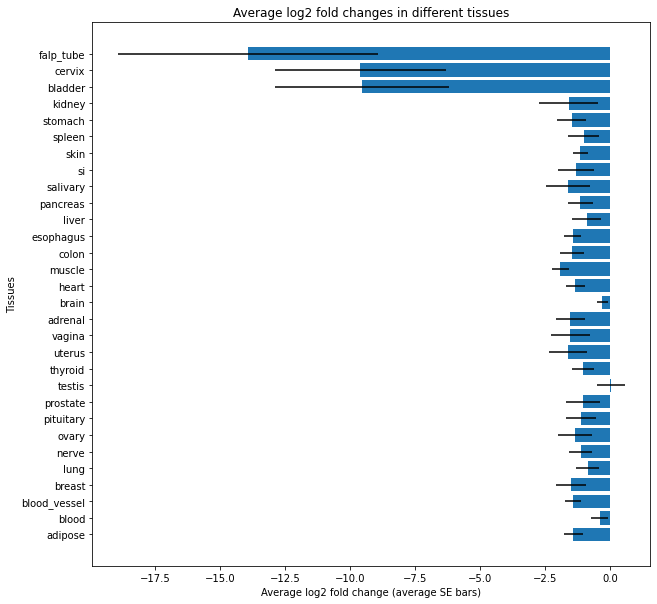

In [ ]:
#bar graph of average log2 fold changes per tissue w/ average se bars

#arrays to store values for each tissue
logfoldtissuemean = []
tissueSE = []

#get all of the averages
for tissuedf in tissuearray:
  logfoldtissuemean.append(tissuedf["log2FoldChange"].mean())
  #multiply by 1.96 to get a 95% confidence interval
  tissueSE.append(1.96* tissuedf["lfcSE"].mean())

#make a horizontal bar graph
fig = plt.figure(figsize = (10, 10))
plt.barh(tissuetypes, logfoldtissuemean, xerr=tissueSE)
plt.ylabel("Tissues")
plt.xlabel("Average log2 fold change (average SE bars)")
plt.title("Average log2 fold changes in different tissues")
plt.show()

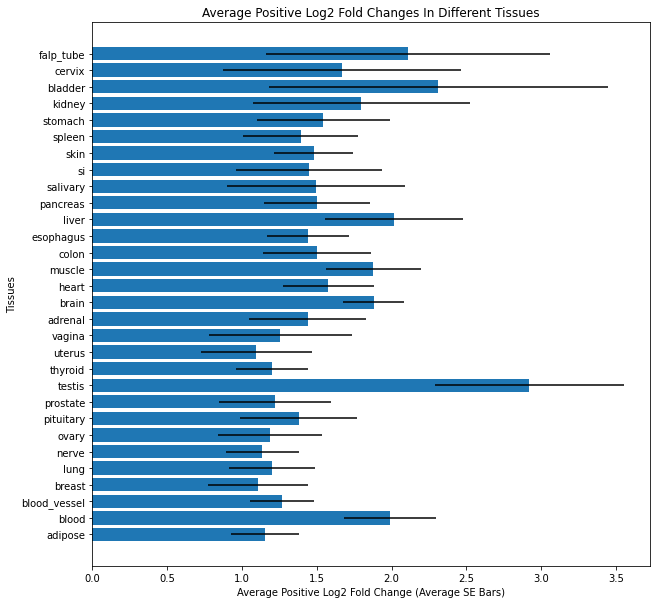

In [ ]:
#bar graph of average positive log2 fold changes per tissue w/ average se bars

import matplotlib.pyplot as plt

#new dataframe with only positive log fold change values
posdf = df[(df['log2FoldChange'] > 0.58) &  (df['padj'] < 0.05)]
#create array of dataframes (each df contains specific type of tissue)
postissuearray = []

for item in tissuetypes:
  postissuearray.append(posdf[posdf['tissue'] == item])

#arrays to store values for each tissue
poslogfoldtissuemean = []
postissueSE = []

#get all of the averages
for tissuedf in postissuearray:
  poslogfoldtissuemean.append(tissuedf["log2FoldChange"].mean())
  #multiply by 1.96 to get a 95% confidence interval
  postissueSE.append(1.96* tissuedf["lfcSE"].mean())

#make a horizontal bar graph
fig = plt.figure(figsize = (10, 10))
plt.barh(tissuetypes, poslogfoldtissuemean, xerr=postissueSE)
plt.ylabel("Tissues")
plt.xlabel("Average Positive Log2 Fold Change (Average SE Bars)")
plt.title("Average Positive Log2 Fold Changes In Different Tissues")
plt.show()

# 3. Tissue-specific transcripts and nontissue-specific transcripts (appear in more than 10 tissues)

Note: In the following code block, the second method (using Counter) was much quicker and gave the same results.

In [ ]:
'''from collections import Counter
from itertools import chain

#get all transcripts that have elevated expression (log2FC > +0.58) and Adj.P <0.05) and put in df array sorted by tissue
transcriptarray = []

for dataframe in tissuearray:
  dataframe = dataframe[(dataframe['log2FoldChange'] > 0.58) &  (dataframe['padj'] < 0.05)]
  for item in dataframe.ensembl_transcript_id_version.unique():
    #print(item)
    transcriptarray.append(item)

print(len(transcriptarray))

tissuespecifictranscripts = []
for item in transcriptarray:
  if transcriptarray.count(item) == 1:
    tissuespecifictranscripts.append(item)

print(len(tissuespecifictranscripts))
'''

from collections import Counter
from itertools import chain

#get all transcripts that have elevated expression (log2FC > +0.58) and Adj.P <0.05) and put in df array sorted by tissue
transcriptarray = []

for dataframe in tissuearray:
  dataframe = dataframe[(dataframe['log2FoldChange'] > 0.58) &  (dataframe['padj'] < 0.05)]
  transcriptarray.append(dataframe.ensembl_transcript_id_version.unique())

print(transcriptarray[2])


#https://www.geeksforgeeks.org/python-symmetric-difference-of-multiple-sets/ 
# getting frequencies using Counter()
# from_iterable() flattens the list 

freq = Counter(chain.from_iterable(transcriptarray))
  
# getting frequency count 1 (appears only once)
tissuespecifictranscripts = list({idx for idx in freq if freq[idx] == 1})

# appears more than 10 times
nontissuespecifictranscripts = list({idx for idx in freq if freq[idx] > 10})

#write a file to save the results
fp = open('/content/tissuespecifictranscripts.txt', 'w')
for item in tissuespecifictranscripts:
  print(item)
  fp.write(item + ' ')
fp.close()

fp = open('/content/nontissuespecifictranscripts.txt', 'w')
for item in nontissuespecifictranscripts:
  print(item)
  fp.write(item + ' ')
fp.close()

In [ ]:
#finding nonspecific transcripts part 2

elevatedexpdf = df[(df['log2FoldChange'] > 0.58) &  (df['padj'] < 0.05)]
elevatedexpdf

#can the same transcript appear multiple times in a one tissue?? they can't
'''
#create array of dataframes (each df contains specific type of tissue)
tissuetypes = df.tissue.unique()
tissuearray = []

for item in tissuetypes:
  tissuearray.append(df[df['tissue'] == item])

print(tissuetypes)
#for each tissue, print the number of unique transcript and the number of rows
equal = []
notequal = []
for tissuedf in tissuearray:
  print(len(tissuedf.ensembl_transcript_id_version.unique()))
  print(tissuedf.shape[0])
  if len(tissuedf.ensembl_transcript_id_version.unique()) == tissuedf.shape[0]:
    equal.append(tissuedf.tissue.unique())
  else:
    notequal.append(tissuedf.tissue.unique())

print(equal)
print(notequal)
'''
#finding nonspecific transcripts part 2: electric boogaloo

elevatedexpdf = df[(df['log2FoldChange'] > 0.58) &  (df['padj'] < 0.05)]
elevatedexpdf

#put all of the transcripts into one list
transcriptlist = elevatedexpdf['ensembl_transcript_id_version'].tolist()

#still 33342
#tissuespecifictranscripts = [x for x in transcriptlist if transcriptlist.count(x) == 1]
#print(len(tissuespecifictranscripts))

#still 72
nontissuespecifictranscripts = []
for item in set(transcriptlist):
  if transcriptlist.count(item) > 10:
    nontissuespecifictranscripts.append(item)
print(len(nontissuespecifictranscripts))


72


In [ ]:
from collections import Counter
from itertools import chain

#get all transcripts that have elevated expression (log2FC > +0.58) and Adj.P <0.01) and put in df array sorted by tissue
transcriptarray = []

for dataframe in tissuearray:
  dataframe = dataframe[(dataframe['log2FoldChange'] > 0.58)& (dataframe['padj'] < 0.01)]
  transcriptarray.append(dataframe.ensembl_transcript_id_version.unique())

#https://www.geeksforgeeks.org/python-symmetric-difference-of-multiple-sets/ 
# getting frequencies using Counter()
# from_iterable() flattens the list 

freq = Counter(chain.from_iterable(transcriptarray))

#there's 30 tissues
#loop to find transcripts that appear in more than X tissues
for i in range(5,30):
  nontissuespecifictranscripts = list({idx for idx in freq if freq[idx] > i})
  print(str(i) + ": " + str(len(nontissuespecifictranscripts)))

# getting frequency count 1 (appears only once)
tissuespecifictranscripts = list({idx for idx in freq if freq[idx] == 1})

#appears in more than 5 tissues (new control group)
nontissuespecifictranscripts = list({idx for idx in freq if freq[idx] > 5})

#write a file to save the results
fp = open('/content/tissuespecifictranscripts.txt', 'w')
for item in tissuespecifictranscripts:
  print(item)
  fp.write(item + ' ')
fp.close()

fp = open('/content/nontissuespecifictranscripts.txt', 'w')
for item in nontissuespecifictranscripts:
  print(item)
  fp.write(item + ' ')
fp.close()

Streaming output truncated to the last 5000 lines.
ENST00000509805.5
ENST00000488537.1
ENST00000447344.1
ENST00000478000.5
ENST00000591137.1
ENST00000434543.1
ENST00000510265.2
ENST00000542008.1
ENST00000616669.4
ENST00000559042.1
ENST00000477972.1
ENST00000566312.1
ENST00000559505.1
ENST00000558121.5
ENST00000557695.1
ENST00000475657.1
ENST00000545339.5
ENST00000530004.5
ENST00000368681.1
ENST00000561682.1
ENST00000340879.8
ENST00000530264.1
ENST00000568720.1
ENST00000558045.2
ENST00000466349.1
ENST00000526055.5
ENST00000442418.5
ENST00000488937.1
ENST00000230565.3
ENST00000414278.1
ENST00000519800.1
ENST00000530410.1
ENST00000416230.1
ENST00000607434.1
ENST00000418800.6
ENST00000577986.4
ENST00000460477.1
ENST00000487766.1
ENST00000559644.5
ENST00000505281.1
ENST00000561269.2
ENST00000623966.1
ENST00000594508.1
ENST00000532671.1
ENST00000492078.1
ENST00000560489.2
ENST00000598786.1
ENST00000504433.1
ENST00000446618.1
ENST00000554275.1
ENST00000606572.1
ENST00000378053.3
ENST000005503

In [ ]:
#list of genes with 2 or more tissue specific transcripts
import collections
from collections import Counter
from itertools import chain

#get list of genes corresponding to each transcript
#question about the data: can different genes have the same transcript?
#question: what should we do with the rows that have the same gene and transcript? do we count that as a gene with 2 or more tissue specific transcripts?

geneswithtst = []
elevatedexpdf = df[(df['log2FoldChange'] > 0.58) &  (df['padj'] < 0.05)]
#test = elevatedexpdf[elevatedexpdf['ensembl_transcript_id_version'].isin(tissuespecifictranscripts)]

#print(df.loc[df['ensembl_transcript_id_version'].isin(tissuespecifictranscripts)])
#get all the genes that have a tissue specific transcript
for item in tissuespecifictranscripts:
  geneswithtst.append(elevatedexpdf[elevatedexpdf['ensembl_transcript_id_version']==item]['ensembl_gene_id'].values[0])

#check list of genes to see which appear twice or more and append to another list
geneswithmultipletst = [item for item, count in collections.Counter(geneswithtst).items() if count > 1]

#write a file to save the results
fp = open('/content/geneswithmultipletst.txt', 'w')
for item in geneswithmultipletst:
  print(item)
  fp.write(item + ' ')
fp.close()


In [ ]:
#read in tissuespecifictranscripts and geneswithmultipletst as lists bc they were saved as files
txt_file = open("/content/tissuespecifictranscripts.txt", "r")
file_content = txt_file.read()
tissuespecifictranscripts = file_content.split(" ")
txt_file.close()

txt_file = open("/content/geneswithmultipletst.txt", "r")
file_content = txt_file.read()
geneswithmultipletst = file_content.split(" ")
txt_file.close()

txt_file = open("/content/nontissuespecifictranscripts.txt", "r")
file_content = txt_file.read()
nontissuespecifictranscripts = file_content.split(" ")
txt_file.close()

# 4. Summary Figures pt 2

In [ ]:
#make a dictionary showing which tissue each tissue specific transcript belongs to
elevatedexpdf = df[(df['log2FoldChange'] > 0.58) &  (df['padj'] < 0.05)]
correspondingtissues = {}

#find out which tissue each tst is in and append it to correspondingtissues
for item in tissuespecifictranscripts:
  #key
  #print(item)
  #value
  #print(elevatedexpdf.loc[elevatedexpdf['ensembl_transcript_id_version'] == item,'tissue'].iloc[0])
  correspondingtissues[item] = elevatedexpdf.loc[elevatedexpdf['ensembl_transcript_id_version'] == item,'tissue'].iloc[0]

#save correspondingtissuesdictionary as a file
import json

with open('transcripttissuedict.txt', 'w') as convert_file:
     convert_file.write(json.dumps(correspondingtissues))
#there are no duplicates of transcripts
#for tissuedf in tissuearray:
#  print(tissuedf['ensembl_transcript_id_version'].duplicated().any())


In [ ]:
#get all the tissue specific transcripts that belong to blood
bloodtsts = [k for k,v in correspondingtissues.items() if v == 'blood']

print(len(bloodtsts))

#make a file to save it
fp = open('/content/bloodtissuespecifictranscripts.txt', 'w')
for item in bloodtsts:
  print(item)
  fp.write(item + ' ')
fp.close()

In [ ]:
#read the files in
import json
with open('/content/transcripttissuedict.txt') as json_file:
    correspondingtissues = json.load(json_file)

txt_file = open("/content/bloodtissuespecifictranscripts.txt", "r")
file_content = txt_file.read()
bloodtsts = file_content.split(" ")
txt_file.close()

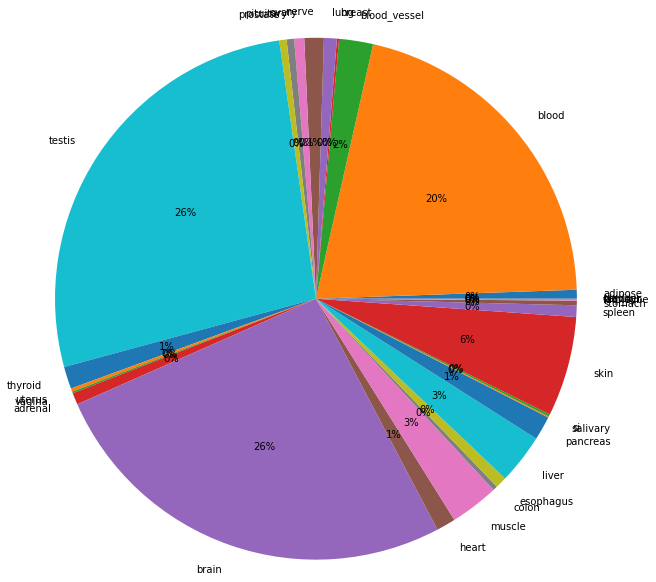

In [ ]:
#make a graph that shows the distribution of tsts across tissues
#pie chart is in google sheets now
import matplotlib.pyplot as plt

#write percentages in the form of a list
percentages = []
for tissue in tissuetypes:
  percentages.append(len([k for k,v in correspondingtissues.items() if v == tissue])/len(correspondingtissues))

#make pie chart
plt.pie(percentages, labels = tissuetypes, autopct='%1.1i%%', radius=3)

#plt.legend(title="Tissues", loc="lower center")
plt.show() 

import csv

with open('/content/transcripttissuedistributionpiechart.csv', mode='w') as idk_file:
    writer = csv.writer(idk_file)

    count = 0
    for item in tissuetypes:
      writer.writerow([item, percentages[count]])
      count += 1

In [ ]:
#get number of tsp transcripts for all tissues
import csv
numoftranscripts = []
for tissue in tissuetypes:
  numoftranscripts.append(len([k for k,v in correspondingtissues.items() if v == tissue]))

print(numoftranscripts)

with open('/content/numoftranscripts.csv', mode='w') as idk_file:
    writer = csv.writer(idk_file)
    writer.writerow(["Tissue", "Number of TSp Transcripts"])

    count = 0
    for item in tissuetypes:
      writer.writerow([item, numoftranscripts[count]])
      count += 1

    writer.writerow(["Total", str(len(tissuespecifictranscripts))])

[183, 6980, 701, 44, 265, 401, 207, 154, 151, 8991, 459, 67, 35, 243, 8697, 397, 1004, 94, 236, 1030, 494, 24, 47, 2065, 239, 95, 35, 2, 1, 1]


In [ ]:
#find # of transcripts that appear in 10 or more tissues and upregulated in blood

bloodelevatedexpdf = df[(df['log2FoldChange'] > 0.58) & (df['padj'] < 0.05) & (df['tissue'] == "blood")]
bloodelevatedexpdftrans = bloodelevatedexpdf.ensembl_transcript_id_version.unique()

bloodnontissuespecific = list(set(bloodelevatedexpdftrans) & set(nontissuespecifictranscripts))
print(bloodnontissuespecific)
  #if it appears in 9 or more tissues, add it to the list

['ENST00000526869.1', 'ENST00000556152.1', 'ENST00000412776.1', 'ENST00000409760.1', 'ENST00000553629.5', 'ENST00000613723.4', 'ENST00000595681.5', 'ENST00000585346.5', 'ENST00000583354.5', 'ENST00000594508.1', 'ENST00000307138.10', 'ENST00000514187.1', 'ENST00000420431.2', 'ENST00000479279.5', 'ENST00000618913.1', 'ENST00000581411.6', 'ENST00000381793.6', 'ENST00000621471.1']


# 5. Using BioMart and getfasta to find promoters of tissue-specific transcripts

Fetch the promoters of tissue -specific transcripts (class 1) and non-tissue specific transcripts (class 2) – one tissue per person.

So there are 2 steps here:
1.   you fetch TSS regions from biomart - https://pypi.org/project/pybiomart/ or https://bioconductor.org/packages/release/bioc/html/biomaRt.html 
2.   You take attributes like strand, transcript id, gene id and TSS, chr start and chr end
3.   Then you try to use TSS and depending on strand information get the upstream and downstream sequence lengths. SO now u will have chr, start (bases away from TSS upstream) and end (bases downstream from TSS).
4.   Then you will fetch the sequences using https://bedtools.readthedocs.io/en/latest/content/tools/getfasta.html
5.   Then comes kmer in the end. Which  I will let you know

In [ ]:
!pip install pybiomart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 4.5 MB/s 
     |████████████████████████████████| 127 kB 41.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pybiomart import Server

#server = Server(host='http://www.ensembl.org')
#server.list_marts()
#mart = server['ENSEMBL_MART_ENSEMBL']
#mart.list_datasets()

dataset = (Server(host='http://www.ensembl.org').marts['ENSEMBL_MART_ENSEMBL']
                 .datasets['hsapiens_gene_ensembl'])

#dataset.list_attributes()
biomartdf = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name', 'ensembl_transcript_id_version', 'strand', 'transcription_start_site', 'chromosome_name'])


for column in biomartdf.columns:
  new_name = column.replace(" ", "_")
  biomartdf.rename(columns={column: new_name.lower()}, inplace=True)

tsslist = biomartdf['transcription_start_site_(tss)'].tolist()
promoterstartlist = []
promoterendlist = []

'''
#for the 3000 length sequences
for i in biomartdf.index:
  if biomartdf['strand'][i] == 1:
    promoterstartlist.append(tsslist[i] - 2000)
    promoterendlist.append(tsslist[i] + 999)
  elif biomartdf['strand'][i] == -1:
    promoterstartlist.append(tsslist[i] - 1000)
    promoterendlist.append(tsslist[i] + 1999)
  else:
    print('Error')
    promoterstartlist.append(0)
    promoterendlist.append(0)
'''

#for the 500 length sequences
for i in biomartdf.index:
  if biomartdf['strand'][i] == 1:
    promoterstartlist.append(tsslist[i] - 300)
    promoterendlist.append(tsslist[i] + 199)
  elif biomartdf['strand'][i] == -1:
    promoterstartlist.append(tsslist[i] - 200)
    promoterendlist.append(tsslist[i] + 299)
  else:
    print('Error')
    promoterstartlist.append(0)
    promoterendlist.append(0)

biomartdf['promoter_start'] = promoterstartlist
biomartdf['promoter_end'] = promoterendlist


#now figure out how to connect it to the tissue specific transcripts i found earlier
#maybe create a subset df w/ tissue specific transcripts and then analyze that?
biomartbloodtstdf = biomartdf[biomartdf.transcript_stable_id_version.isin(bloodtsts)]
biomartnonspecificdf = biomartdf[biomartdf.transcript_stable_id_version.isin(nontissuespecifictranscripts)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if sys.path[0] == '':


In [ ]:
biomartbloodtstdf

,gene_stable_id,gene_name,transcript_stable_id_version,strand,transcription_start_site_(tss),chromosome/scaffold_name,promoter_start,promoter_end
9378,ENSG00000228411,CDY4P,ENST00000418290.1,-1,12803830,Y,12803630,12804129
10053,ENSG00000099725,PRKY,ENST00000533551.5,1,7274313,Y,7274013,7274512
10734,ENSG00000183878,UTY,ENST00000479713.1,-1,13479923,Y,13479723,13480222
11118,ENSG00000241859,ANOS2P,ENST00000430079.5,1,13751793,Y,13751493,13751992
11791,ENSG00000231535,LINC00278,ENST00000425031.1,1,3002998,Y,3002698,3003197
...,...,...,...,...,...,...,...,...
272845,ENSG00000117676,RPS6KA1,ENST00000530607.1,1,26545845,1,26545545,26546044
272846,ENSG00000117676,RPS6KA1,ENST00000531382.5,1,26545852,1,26545552,26546051
272850,ENSG00000117676,RPS6KA1,ENST00000488985.1,1,26555199,1,26554899,26555398
272851,ENSG00000117676,RPS6KA1,ENST00000403732.2,1,26557043,1,26556743,26557242


In [ ]:
biomartnonspecificdf

,gene_stable_id,gene_name,transcript_stable_id_version,strand,transcription_start_site_(tss),chromosome/scaffold_name,promoter_start,promoter_end
9214,ENSG00000235649,MXRA5Y,ENST00000420610.1,1,11957208,Y,11956908,11957407
9470,ENSG00000229308,NaN,ENST00000426699.1,1,4036497,Y,4036197,4036696
10480,ENSG00000229163,NAP1L1P2,ENST00000414182.2,-1,2931120,Y,2930920,2931419
11371,ENSG00000092377,TBL1Y,ENST00000346432.3,1,6910686,Y,6910386,6910885
14334,ENSG00000102699,PARP4,ENST00000484989.1,-1,24455134,13,24454934,24455433
...,...,...,...,...,...,...,...,...
272810,ENSG00000143442,POGZ,ENST00000358476.7,-1,151459178,1,151458978,151459477
272820,ENSG00000143442,POGZ,ENST00000497787.1,-1,151408196,1,151407996,151408495
272822,ENSG00000143442,POGZ,ENST00000482678.1,-1,151424463,1,151424263,151424762
272828,ENSG00000143442,POGZ,ENST00000467287.5,-1,151459187,1,151458987,151459486


In [ ]:
#create bed file with chromosome name, start, end, and strand for blood specific
fp = open('/content/bloodspecific500bed.bed', 'w')

for i in biomartbloodtstdf.index:
  if biomartbloodtstdf['strand'][i] == 1:
    strandinfo = "+" 
  else:
    strandinfo = "-"

  fp.write("chr" + str(biomartbloodtstdf['chromosome/scaffold_name'][i]) + "\t" + 
        str(biomartbloodtstdf['promoter_start'][i]) + "\t" + 
        str(biomartbloodtstdf['promoter_end'][i]) + "\t" + 
        strandinfo + "\n")
        #"None" + "\t" + "0" + "\t" + strandinfo + "\n")
fp.close()

'''
fp = open('/content/test_2.bed', 'w')



#for i in biomartbloodtstdf['strand']:
#  if i == 1:
#    print('+')
#  else:
#    print('-')

count = 0
indexed_list = list(biomartbloodtstdf.index)

for i in biomartbloodtstdf['strand']:
  if i == 1:
    strandinfo = "+" 
  else:
    strandinfo = "-"

  final_index = indexed_list[count]
  fp.write("chr" + str(biomartbloodtstdf['chromosome/scaffold_name'][final_index]) + "\t" + 
        str(biomartbloodtstdf['promoter_start'][final_index]) + "\t" + 
        str(biomartbloodtstdf['promoter_end'][final_index]) + "\t" + 
        strandinfo + "\n")
        #"None" + "\t" + "0" + "\t" + strandinfo + "\n")
  count = count + 1
fp.close()
'''

'\nfp = open(\'/content/test_2.bed\', \'w\')\n\n\n\n#for i in biomartbloodtstdf[\'strand\']:\n#  if i == 1:\n#    print(\'+\')\n#  else:\n#    print(\'-\')\n\ncount = 0\nindexed_list = list(biomartbloodtstdf.index)\n\nfor i in biomartbloodtstdf[\'strand\']:\n  if i == 1:\n    strandinfo = "+" \n  else:\n    strandinfo = "-"\n\n  final_index = indexed_list[count]\n  fp.write("chr" + str(biomartbloodtstdf[\'chromosome/scaffold_name\'][final_index]) + "\t" + \n        str(biomartbloodtstdf[\'promoter_start\'][final_index]) + "\t" + \n        str(biomartbloodtstdf[\'promoter_end\'][final_index]) + "\t" + \n        strandinfo + "\n")\n        #"None" + "\t" + "0" + "\t" + strandinfo + "\n")\n  count = count + 1\nfp.close()\n'

In [ ]:
#bed file for nonspecific transcripts
fp = open('/content/nonspecific500bed.bed', 'w')
for i in biomartnonspecificdf.index:
  if biomartnonspecificdf['strand'][i] == 1:
    strandinfo = "+" 
  else:
    strandinfo = "-"

  fp.write("chr" + str(biomartnonspecificdf['chromosome/scaffold_name'][i]) + "\t" + 
        str(biomartnonspecificdf['promoter_start'][i]) + "\t" + 
        str(biomartnonspecificdf['promoter_end'][i]) + "\t" + 
        strandinfo + "\n")
        #"None" + "\t" + "0" + "\t" + strandinfo + "\n")
fp.close()

Use bedtools getfasta in terminal to get the fasta file

command: bedtools getfasta -fi GCA_000001405.15_GRCh38_no_alt_analysis_set.fna -bed desktop/CSIRE_2022/outputs/nonspecificbed.bed -fo nonspecificfasta.fa.out

In [ ]:
#write the csv files with the transcript ID and promoter sequence
#for blood-specific transcripts
import csv

# read the content of the file opened
bloodspecificfasta = open('/content/bloodspecific500fasta.txt').readlines()


with open('/content/bloodspecific500_transcriptfasta.csv', mode='w') as bloodspecific_transcriptfasta:
  writer = csv.writer(bloodspecific_transcriptfasta)

  linecount = 1
  for i in biomartbloodtstdf.index:
    transcriptid = biomartbloodtstdf["transcript_stable_id_version"][i]
    fastaseq = bloodspecificfasta[linecount]
    writer.writerow([transcriptid, fastaseq])
    linecount += 2

In [ ]:
#write the csv files with the transcript ID and promoter sequence
#for nonspecific transcripts
import csv

# read the content of the file opened
nonspecificfasta = open('/content/nonspecific500fasta.txt').readlines()
print(len(nonspecificfasta))

with open('/content/nonspecific500_transcriptfasta.csv', mode='w') as nonspecific_transcriptfasta:
  writer = csv.writer(nonspecific_transcriptfasta)

  linecount = 1
  for i in biomartnonspecificdf.index:
    transcriptid = biomartnonspecificdf["transcript_stable_id_version"][i]
    #print(transcriptid)
    #print(biomartnonspecificdf["promoter_start"][i])
    fastaseq = nonspecificfasta[linecount]
    #print(fastaseq)
    writer.writerow([transcriptid, fastaseq])
    linecount += 2

25884


In [ ]:
#csv file with transcript and kmers

def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space
    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers


#for blood-specific transcripts
import csv

# read the content of the file opened
bloodspecificfasta = open('/content/bloodspecific500fasta.txt').readlines()

with open('/content/bloodspecific500_kmer.csv', mode='w') as bloodspecific_transcriptfasta:
  writer = csv.writer(bloodspecific_transcriptfasta)

  linecount = 1
  for i in biomartbloodtstdf.index:
    transcriptid = biomartbloodtstdf["transcript_stable_id_version"][i]
    kmer = seq2kmer(bloodspecificfasta[linecount], 6)
    writer.writerow([transcriptid, kmer])
    linecount += 2



#for nonspecific transcripts
import csv

# read the content of the file opened
nonspecificfasta = open('/content/nonspecific500fasta.txt').readlines()

with open('/content/nonspecific500_kmer.csv', mode='w') as nonspecific_transcriptfasta:
  writer = csv.writer(nonspecific_transcriptfasta)

  linecount = 1
  for i in biomartnonspecificdf.index:
    transcriptid = biomartnonspecificdf["transcript_stable_id_version"][i]
    #print(transcriptid)
    #print(biomartnonspecificdf["promoter_start"][i])
    kmer = seq2kmer(nonspecificfasta[linecount], 6)
    #print(fastaseq)
    writer.writerow([transcriptid, kmer])
    linecount += 2

# Functional Enrichment Analysis and Pathway Analysis

Acute Myeloid Leukemia—Genetic Alterations and Their Clinical Prognosis: "Recently, with the development of methodologies of massive sequencing, new genetic mutations associated with acute myeloid leukemia have been identified. Some of the identified genes include KIT, FLT3, NPM1, CEBPA, RAS, WT1, BAALC, ERG, MN1, DNMT, TET2, IDH, ASXL1, PTPN11 and CBL. Of all these, WHO highlighting the related mutations in FLT3, NPM1 and CEBPα genes because they are associated with treatment response and progress of this disease"

In [ ]:
#list from enrichr Top 10 genes that mostly co-mention with acute myeloid leukemia 
#identified with GeneRIF literature gene-gene co-mentions                                 
enrichrlist = ["CEBPA","DNMT3A","FLT3","IDH1","KIT","KMT2A","NPM1","RUNX1","TP53","WT1"]

for item in enrichrlist:
  if item in biomartbloodtstdf.gene_name.unique():
    print(item)

#FLT3 was found in all three lists

DNMT3A
FLT3
RUNX1
TP53


In [ ]:
biomartbloodtstdf

,gene_stable_id,gene_name,transcript_stable_id_version,strand,transcription_start_site_(tss),chromosome/scaffold_name,promoter_start,promoter_end
9378,ENSG00000228411,CDY4P,ENST00000418290.1,-1,12803830,Y,12802830,12805829
10053,ENSG00000099725,PRKY,ENST00000533551.5,1,7274313,Y,7272313,7275312
10734,ENSG00000183878,UTY,ENST00000479713.1,-1,13479923,Y,13478923,13481922
11118,ENSG00000241859,ANOS2P,ENST00000430079.5,1,13751793,Y,13749793,13752792
11791,ENSG00000231535,LINC00278,ENST00000425031.1,1,3002998,Y,3000998,3003997
...,...,...,...,...,...,...,...,...
272845,ENSG00000117676,RPS6KA1,ENST00000530607.1,1,26545845,1,26543845,26546844
272846,ENSG00000117676,RPS6KA1,ENST00000531382.5,1,26545852,1,26543852,26546851
272850,ENSG00000117676,RPS6KA1,ENST00000488985.1,1,26555199,1,26553199,26556198
272851,ENSG00000117676,RPS6KA1,ENST00000403732.2,1,26557043,1,26555043,26558042


In [ ]:
#import pandas as pd
#pathway analysis of genes tissue-specific to blood

#since enrichr will only take entrez gene symbols, need to match up each of the transcripts with that gene name
bloodelevatedexpdf = df[(df['log2FoldChange'] > 0.58) & (df['padj'] < 0.05) & (df['tissue'] == "blood")]
genesforbloodtsts = []
for item in bloodtsts:
  genesforbloodtsts.append(bloodelevatedexpdf.loc[bloodelevatedexpdf['ensembl_transcript_id_version'] == item, 'external_gene_name'].values[0])

#some of the transcripts don't have an external gene name (nan), so remove it
#also remove duplicates
genesforbloodtsts = set([x for x in genesforbloodtsts if pd.isnull(x) == False])

#formatting to put it into enrichr
for item in genesforbloodtsts:
  print(item)

PGK1
D2HGDH
TBKBP1
APBA3
ZWILCH
CNOT10
EHBP1
IFI27L1
ICAM3
TP73
RPS27AP8
CLEC2D
EPSTI1
GPAA1
IPO7
POU2F2
PIK3R5
UCP2
SUMO2P1
TARS2
MLH1
MYL12A
DHX57
FARSA
IL21R
CDYL
RAD23A
LINC02273
SPNS3
ARHGAP9
OIT3
PRAM1
DSCR9
PSMD6
NFXL1
E2F7
FPGT
CMTM1
B2M
RNF130
AOC1
CEP128
EPHB1
PIGQ
MBD2
C1orf112
TBCK
LIMK2
RPL28
EMC2
ANKRD24
PGD
VSIR
ABI1P1
TAS2R62P
WDR1
ITIH1
ALG6
IFIT1B
MLLT3
IKBKGP1
NXF1
LINC01934
PDZD8
DDX43
SMG1P1
NRBF2P4
DNAJA3
NINJ1
PUF60
DPH3
SH3BGRL3
MRPL3P1
PIGU
PRKAB1
RNF121
RFWD3
PRDM2
FECH
NKG7
RNGTT
TARS1
AP2A2
GCNT2
ZNF207
CXCR2P1
MPI
RIT1
CD84
CLN6
GRN
DDX46
TRPV5
ZNF510
FCER2
CD6
PNKP
PELATON
NELFE
TFIP11
KNSTRN
SYVN1
TMEM104
LINC02865
RNVU1-15
MAPK3
SIRPB2
HAUS4
PGAM1P8
PPP4R2
SYNE2
NFATC2
ZNF195
COASY
UBE3D
RN7SL600P
ZNF230
ABCB7
HEATR6
LZTR1
SNORA79B
RACGAP1
XPNPEP3
KLRG1
BACH1
PRPF38B
MTMR10
TYROBP
CD3D
NDEL1
SIGLEC10
ARF5
PLB1
DECR1
RPL23AP30
RECQL4
PLCG2
CEND1
HVCN1
CAMP
RN7SKP151
PHF23
TPP2
KIAA2013
PANK4
TRAF3
XRN1
JCHAIN
USP3
PFAS
POGZ
PAX5
RPS6KA5
SDCBP
TTLL4
BACH2


# 6. DNABERT Fine Tuning File Prepraration

In [ ]:
#make one file with kmer and label (label 1 for all kemrs of the blood-specific file and 0 for nonspecific files)
#add headers
#shuffle

import pandas as pd
import numpy as np
import csv

#read both kmer files in
bloodkmer = pd.read_csv("/content/bloodspecific500_kmer.csv")
nonspeckmer = pd.read_csv("/content/nonspecific500_kmer.csv")

with open('/content/anooshka_dnabert_finetuning.csv', mode='w') as myfile:
  writer = csv.writer(myfile)

  writer.writerow(['sequence', 'label'])
  for i in bloodkmer.index:
    writer.writerow([bloodkmer["kmer"][i], '1'])

  for i in nonspeckmer.index:
    writer.writerow([nonspeckmer["kmer"][i], '0'])

'\n# read the content of the file opened\nbloodspecificfasta = open(\'/content/bloodspecific500fasta.txt\').readlines()\n\nwith open(\'/content/bloodspecific500_kmer.csv\', mode=\'w\') as bloodspecific_transcriptfasta:\n  writer = csv.writer(bloodspecific_transcriptfasta)\n\n  linecount = 1\n  for i in biomartbloodtstdf.index:\n    transcriptid = biomartbloodtstdf["transcript_stable_id_version"][i]\n    kmer = seq2kmer(bloodspecificfasta[linecount], 6)\n\n    linecount += 2\n\n#for both files, write in each line again but add corresponding label\n\n#shuffle at the end'

In [ ]:
unshuffled_file = pd.read_csv("/content/anooshka_dnabert_finetuning.csv")

shuffled_file = unshuffled_file.sample(frac=1).reset_index(drop=True)
shuffled_file.to_csv('/content/anooshka_dnabert_finetuning_final.csv', index=False)